In [1]:
import os
# tensorflow-gpu is installed, with RTX 2060
# CPU actually performs best since there is a lot of data travelling to and from GPU
# CPU has higher frequency for this --> we disable gpu usage
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import glob
import re

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from keras.layers import Dense
from keras.models import Sequential
from keras.initializers import RandomUniform
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

from mlf import NNClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping

In [3]:
NUM_TOPICS = glob.glob(r'data/nlp/*.gensim')
NUM_TOPICS = [int(re.findall(r'\d+', s)[0]) for s in NUM_TOPICS]
NUM_DAYS = [2, 3, 5, 7, 14, 21, 28, 35, 42, 49, 56]

In [4]:
reg = NNClassifier()
_, _ = reg.generate_xy(num_topics=100, num_days=28, keep_app=True)
_ = reg.scale_x()

/home/williammartin/miniconda3/envs/epfl/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/williammartin/Github/mlf-project/mlf/mlf_utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_app_prior'] = np.nan


In [5]:
# perform PCA
pca = PCA(n_components=0.6, svd_solver='full')
pca = pca.fit(reg.X_scaled)
X = pca.transform(reg.X_scaled)

In [6]:
# separate train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    reg.y['y_bin'],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=reg.y['y_bin']
                                                    )

In [7]:
reg.add_layers(X_train.shape[1], X_train.shape[1]//2, 1, activation='sigmoid')
reg.define_optimizer(0.01) # learning rate of SGD

In [8]:
reg.layers

In [9]:
epochs = 1000
batch_size = 256

tb = tf.compat.v1.keras.callbacks.TensorBoard(histogram_freq=1, write_grads=True, profile_batch=0)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = reg.fit(X_train, y_train, validation_data=(X_test, y_test),
                  epochs=epochs, 
                  batch_size=batch_size,
                  verbose=1,
                  callbacks=[es, tb])

Epoch 1/1000
27/27 [==============================] - 0s 5ms/step - loss: 0.9460 - accuracy: 0.5015 - val_loss: 0.8862 - val_accuracy: 0.5424
Epoch 2/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8636 - accuracy: 0.5248 - val_loss: 0.8555 - val_accuracy: 0.5262
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.5302 - val_loss: 0.8457 - val_accuracy: 0.5304
Epoch 4/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.5346 - val_loss: 0.8388 - val_accuracy: 0.5314
Epoch 5/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8305 - accuracy: 0.5329 - val_loss: 0.8327 - val_accuracy: 0.5345
Epoch 6/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8254 - accuracy: 0.5411 - val_loss: 0.8280 - val_accuracy: 0.5365
Epoch 7/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.8207 - accuracy: 0.5439 - val_loss: 0.8238 - val_accuracy: 0.5365
Epoch 

27/27 [==============================] - 0s 2ms/step - loss: 0.7100 - accuracy: 0.5667 - val_loss: 0.7170 - val_accuracy: 0.5540
Epoch 115/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.7096 - accuracy: 0.5668 - val_loss: 0.7166 - val_accuracy: 0.5540
Epoch 116/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.7093 - accuracy: 0.5665 - val_loss: 0.7162 - val_accuracy: 0.5530
Epoch 117/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.5665 - val_loss: 0.7158 - val_accuracy: 0.5533
Epoch 118/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.5645 - val_loss: 0.7154 - val_accuracy: 0.5551
Epoch 119/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.5673 - val_loss: 0.7150 - val_accuracy: 0.5537
Epoch 120/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.5664 - val_loss: 0.7146 - val_accuracy: 0.5554
Epoch 1

Epoch 171/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5670 - val_loss: 0.7028 - val_accuracy: 0.5595
Epoch 172/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.5684 - val_loss: 0.7026 - val_accuracy: 0.5592
Epoch 173/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5670 - val_loss: 0.7025 - val_accuracy: 0.5592
Epoch 174/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.5667 - val_loss: 0.7024 - val_accuracy: 0.5599
Epoch 175/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5673 - val_loss: 0.7023 - val_accuracy: 0.5595
Epoch 176/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5676 - val_loss: 0.7021 - val_accuracy: 0.5595
Epoch 177/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5674 - val_loss: 0.7020 - val_accuracy:

Epoch 228/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5686 - val_loss: 0.6977 - val_accuracy: 0.5630
Epoch 229/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5692 - val_loss: 0.6977 - val_accuracy: 0.5630
Epoch 230/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5684 - val_loss: 0.6976 - val_accuracy: 0.5626
Epoch 231/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5686 - val_loss: 0.6976 - val_accuracy: 0.5609
Epoch 232/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5687 - val_loss: 0.6975 - val_accuracy: 0.5633
Epoch 233/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5690 - val_loss: 0.6975 - val_accuracy: 0.5626
Epoch 234/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5690 - val_loss: 0.6974 - val_accuracy:

Epoch 285/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5711 - val_loss: 0.6956 - val_accuracy: 0.5602
Epoch 286/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5708 - val_loss: 0.6956 - val_accuracy: 0.5626
Epoch 287/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5717 - val_loss: 0.6955 - val_accuracy: 0.5599
Epoch 288/1000
27/27 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5726 - val_loss: 0.6955 - val_accuracy: 0.5585
Epoch 289/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5705 - val_loss: 0.6955 - val_accuracy: 0.5609
Epoch 290/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5712 - val_loss: 0.6955 - val_accuracy: 0.5599
Epoch 291/1000
27/27 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5708 - val_loss: 0.6954 - val_accuracy:

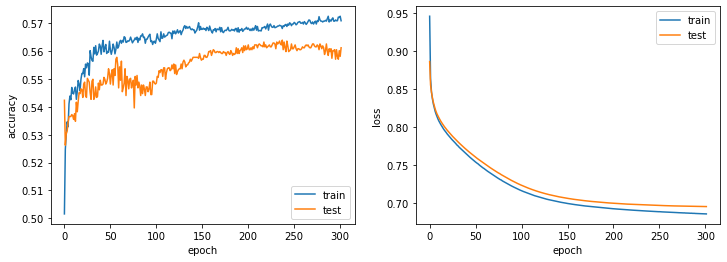

In [10]:
## plot
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
ax[0].plot(history.history['accuracy'], label='train')
ax[0].plot(history.history['val_accuracy'], label='test')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend()

ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend()